# Traitement données publiques RPPS

Charger les bibliothèques nécessaires

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pyproj

%matplotlib inline

## Chargement des données téléchargées

In [19]:
data = pd.read_csv("./ExtractionMonoTable_CAT18_ToutePopulation_201909270859.csv",sep=";",low_memory=False)

In [5]:
data[0:5]

,Type d'identifiant PP,Identifiant PP,Identification nationale PP,Code civilité exercice,Libellé civilité exercice,Nom d'exercice,Prénom d'exercice,Code profession,Libellé profession,Code catégorie professionnelle,...,Code commune (coord. structure),Libellé commune (coord. structure),Code pays (coord. structure),Libellé pays (coord. structure),Téléphone (coord. structure),Téléphone 2 (coord. structure),Télécopie (coord. structure),Adresse e-mail (coord. structure),Adresse BAL MSSanté,Unnamed: 41
0,8,10100078798,810100078798,DR,Docteur,MOUDDEN,NOAMANE,10,Médecin,C,...,75120,Paris 20e Arrondissement,NaN,NaN,0175776550,NaN,0153382012,directionmas@ose-france.org,NaN,NaN
1,8,10002995347,810002995347,DR,Docteur,MOULIN,BEATRICE,10,Médecin,C,...,38563,Voiron,99000.0,France,04 76 05 60 66,NaN,NaN,NaN,NaN,NaN
2,8,10004027305,810004027305,DR,Docteur,DANEKOVA,NEVENA,10,Médecin,C,...,92025,Colombes,NaN,NaN,0147606162,NaN,0147606275,guillaume.caro@aphp.fr,NaN,NaN
3,8,10005225783,810005225783,DR,Docteur,SCHIEHLE,MARIE,40,Chirurgien-Dentiste,C,...,44043,Clisson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,10003388013,810003388013,DR,Docteur,DOZOUL,PIERRE,10,Médecin,C,...,83118,Saint-Raphaël,99000.0,France,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Type d'identifiant PP', 'Identifiant PP',
       'Identification nationale PP', 'Code civilité exercice',
       'Libellé civilité exercice', 'Nom d'exercice', 'Prénom d'exercice',
       'Code profession', 'Libellé profession',
       'Code catégorie professionnelle', 'Libellé catégorie professionnelle',
       'Code savoir-faire', 'Libellé savoir-faire', 'Code type savoir-faire',
       'Libellé type savoir-faire', 'Numéro SIRET site', 'Numéro SIREN site',
       'Numéro FINESS site', 'Numéro FINESS établissement juridique',
       'Raison sociale site', 'Enseigne commerciale site',
       'Identifiant structure', 'Complément destinataire (coord. structure)',
       'Complément point géographique (coord. structure)',
       'Numéro Voie (coord. structure)',
       'Indice répétition voie (coord. structure)',
       'Code type de voie (coord. structure)',
       'Libellé type de voie (coord. structure)',
       'Libellé Voie (coord. structure)',
       'Mention distribution (c

## Distribution des spécialités

In [81]:
data['Libellé savoir-faire'].value_counts()[0:30]

Spécialiste en Médecine Générale           88624
Qualifié en Médecine Générale              73100
Radio-diagnostic                           32264
Psychiatrie                                23178
Anesthesie-réanimation                     18795
Cardiologie et maladies vasculaires        16394
Médecine Générale                          14391
Pédiatrie                                  14225
Ophtalmologie                              13257
Gynécologie-obstétrique                     9197
Médecine du travail                         8533
Gastro-entérologie et hépatologie           8300
Chirurgie orthopédique et traumatologie     7946
Chirurgie générale                          7122
Dermatologie et vénéréologie                7092
Pneumologie                                 5691
Oto-rhino-laryngologie                      5115
Rhumatologie                                4898
Neurologie                                  4232
Anatomie et cytologie pathologiques         4170
Biologie médicale   

## Les oncologues (au sens large)

In [20]:
labels_onco = [i for i in data['Libellé savoir-faire'].dropna().unique() if "onco" in i.lower()]
labels_onco

['Hématologie (option Onco-hématologie)',
 'Oncologie option médicale',
 'Oncologie option radiothérapie',
 'Oncologie (option onco-hématologie)']

In [23]:
data_onco = data[data["Libellé savoir-faire"].isin(labels_onco)]
data["Libellé savoir-faire"].isin(labels_onco).value_counts()

False    733248
True       3755
Name: Libellé savoir-faire, dtype: int64

In [28]:
data_onco['Raison sociale site'].value_counts()[0:10]

SELARL GROUPE D'IMAGERIE MEDICALE ET DE CANCEROLOGIE DU PONT SAINT VAAST         125
SCP DRS FRANCK DUDOUET ET AUTRES, ONCORAD GARONNE                                107
CLCC INSTITUT GUSTAVE ROUSSY                                                      85
SELARL UNITE DE RADIOTHERAPIE REPUBLIQUE EN ABREGE U2R                            54
SELARL D'IMAGERIE MEDICALE DE RADIOTHERAPIE ET D'ONCOLOGIE  I.M.R.O.              48
CENTRE LEON BERARD                                                                47
CLCC  INSTITUT CURIE                                                              43
INSTITUT PAOLI CALMETTES                                                          39
CARIO - CENTRE ARMORICAIN DE RADIOTHERAPIE D IMAGERIE MEDICALE ET D ONCOLOGIE     36
CENTRE ANTOINE LACASSAGNE                                                         35
Name: Raison sociale site, dtype: int64

In [29]:
data_onco['Identifiant structure'].value_counts()[0:10]

1940000664    85
1690000880    47
1750160012    43
1130001647    39
1060000528    35
1750803447    29
1440001113    28
1250006954    28
1140000555    27
1750100125    27
Name: Identifiant structure, dtype: int64

In [53]:
def construire_adresse(x):
    x = x.fillna("")
    num = str(x["Numéro Voie (coord. structure)"])+x["Indice répétition voie (coord. structure)"]
    rue = x["Libellé type de voie (coord. structure)"]+" "+x["Libellé Voie (coord. structure)"]+" "+x["Bureau cedex (coord. structure)"]
    return num.replace(".0","")+" "+rue.lower()
data_onco["adresse"] = data_onco[data_onco.columns[24:]].apply(construire_adresse,axis=1)

C:\Users\eschultz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
data_onco["adresse"].value_counts()[0:10]

                                                            377
39B rue camille desmoulins 94805 villejuif cedex             85
28 rue laennec 69373 lyon cedex 08                           48
26 rue d ulm 75248 paris cedex 05                            43
232 boulevard sainte marguerite 13273 marseille cedex 09     39
36 avenue de valombrose 06189 nice cedex 2                   35
1 avenue irene joliot curie 31059 toulouse cedex 9           32
20 rue leblanc 75908 paris cedex 15                          29
 boulevard jacques monod 44805 st herblain cedex             28
3 boulevard fleming 25030 besancon cedex                     28
Name: adresse, dtype: int64

Sortie pour recodage adresse (utilisation de adresse.gouv.fr)

In [57]:
data_onco[["adresse"]].to_csv("./adresses_onco.csv")

Géocodage + chargement des données

In [68]:
data_onco = data_onco.join(pd.read_csv("./adresses_onco.geocoded.csv",sep=";").set_index("Unnamed: 0"),rsuffix="geocod")

In [77]:
data_onco["gps"] = data_onco.apply(lambda x : (x["latitude"],x["longitude"]) if pd.notnull(x["latitude"]) else None,axis=1)

## Création des données pour la cartographie

Mise en forme des données

In [78]:
carto = data_onco["gps"].value_counts().reset_index()
carto.columns = ["gps","num"]
carto = carto.dropna()

Passage en coordonnées lambert

In [91]:
#transformations géographiques
wgs84 =  pyproj.Proj('+init=EPSG:4326')
lambert = pyproj.Proj('+init=EPSG:2154')

carto["X"] = carto["gps"].apply(lambda x : pyproj.transform(wgs84,lambert,x[1],x[0])[0])
carto["Y"] = carto["gps"].apply(lambda x : pyproj.transform(wgs84,lambert,x[1],x[0])[1])

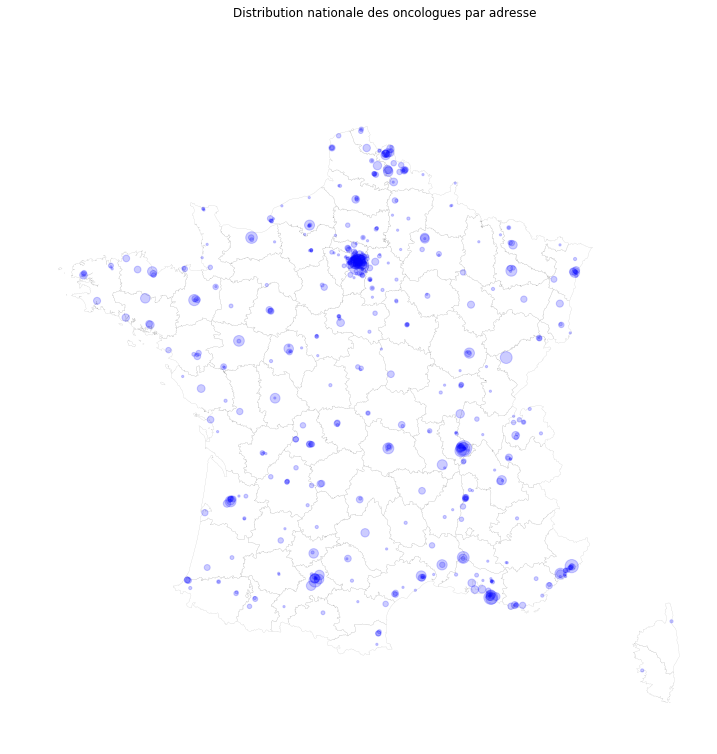

In [129]:
carte = gpd.read_file("departements/DEPARTEMENT.shp")
ax = carte.plot(zorder=-1,alpha=0.5,facecolor='white',figsize=(15,13),linewidth=0.1,edgecolor="black")
plt.scatter(x=list(carto["X"]),y=list(carto["Y"]),s = list(carto["num"].apply(lambda x : 5*x)),
            zorder=8,c="blue",alpha=0.2)
plt.xlim(100000,1300000)
plt.ylim(6000000,7300000)
plt.grid(False)
plt.axis('off')
plt.title("Distribution nationale des oncologues par adresse")
plt.savefig("repartition-nationale-oncologues.png",dpi=300)